In [25]:
import glob
import os
import librosa
import librosa.display
import librosa.core

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        print(sr)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.core.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()
    

22050


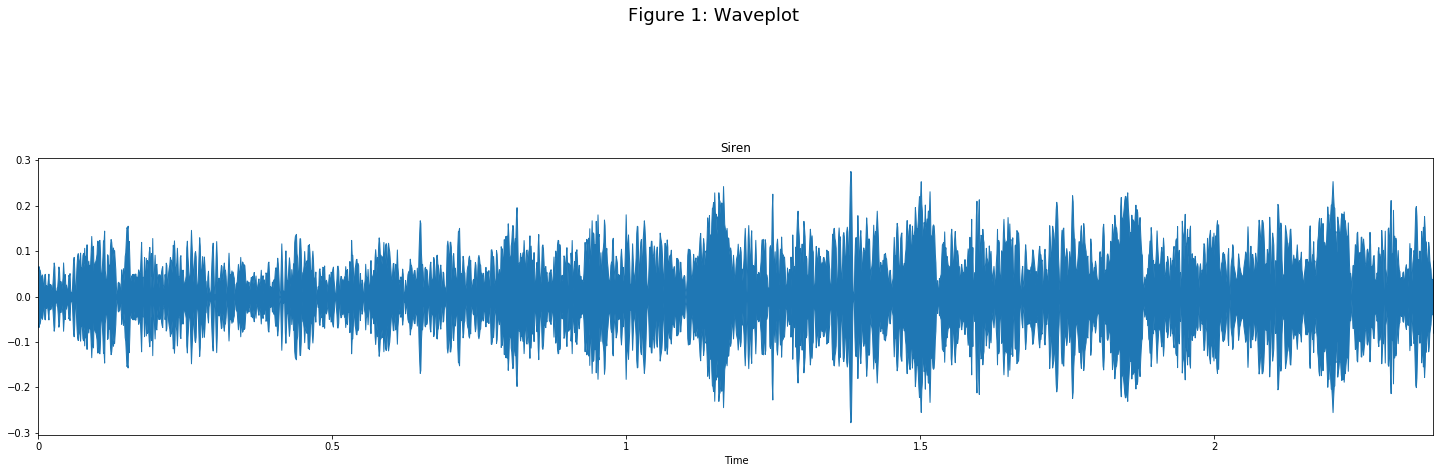

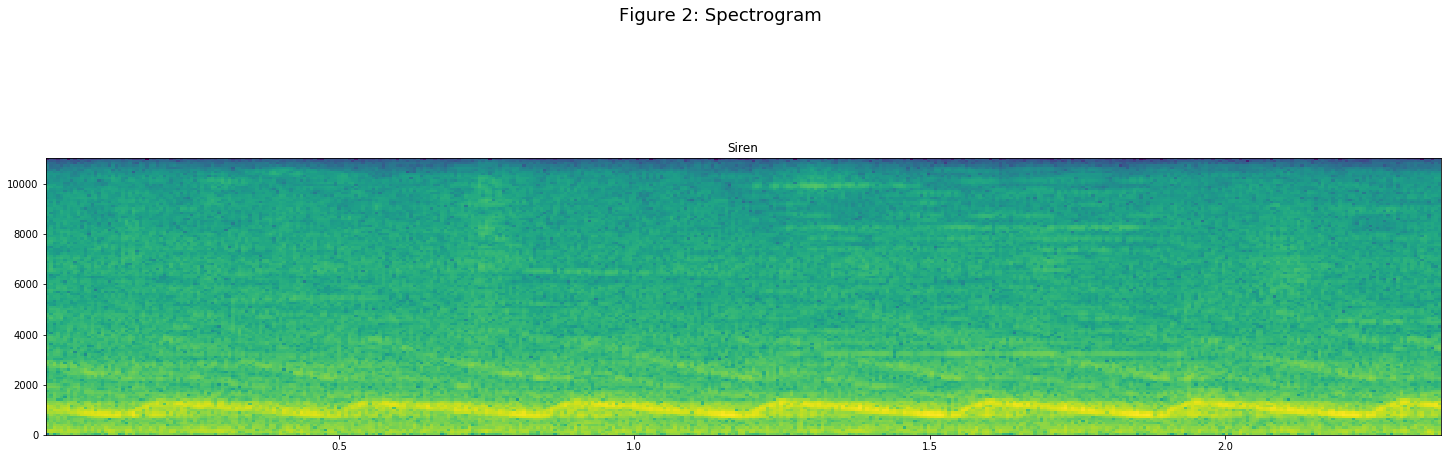

In [34]:
sound_file_paths = ["/Users/sailana/Desktop/Machine Learning/FInalProject/UrbanSound/data/siren/26173.wav"]

sound_names = ["siren"]

raw_sounds = load_sound_files(sound_file_paths)
plot_waves(sound_names,raw_sounds)
plot_specgram(sound_names,raw_sounds)
# plot_log_power_specgram(sound_names,raw_sounds)

In [12]:
raw_sounds[0].shape[0]

(2476656,)

In [19]:
raw_sounds[0].shape[0]

52343

In [21]:
raw_sounds[0]

array([ 0.00845499, -0.0029767 , -0.02512286, ..., -0.01926676,
       -0.04650491, -0.02291995], dtype=float32)

In [15]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print "Error encountered while parsing file: ", fn
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [8]:
parent_dir = 'Sound-Data'
tr_sub_dirs = ["fold1","fold2"]
ts_sub_dirs = ["fold3"]
tr_features, tr_labels = parse_audio_files(parent_dir,tr_sub_dirs)
ts_features, ts_labels = parse_audio_files(parent_dir,ts_sub_dirs)

tr_labels = one_hot_encode(tr_labels)
ts_labels = one_hot_encode(ts_labels)

In [13]:
D = librosa.logamplitude(np.abs(librosa.stft(y))**2, ref_power=np.max)
librosa.display.specshow(D,x_axis='time' ,y_axis='log')

AttributeError: 'module' object has no attribute 'logamplitude'

1326305

In [35]:
np.shape(raw_sounds[0])[0]/2

26171

In [23]:
import soundfile as sf

# data, samplerate = sf.read('existing_file.wav')
# sf.write('new_file.ogg', data, samplerate)

In [76]:
raw_sounds[0]

array([ 0.00845499, -0.0029767 , -0.02512286, ..., -0.01926676,
       -0.04650491, -0.02291995], dtype=float32)

In [78]:
raw_sounds[0].shape

(52343,)

In [79]:
dummy  = np.zeros(52343)

In [80]:
for i in range(52343):
    dummy[i] = raw_sounds[0][i]

In [82]:
sf.write('new_file.wav', dummy, 22050/4)